## Libraries

In [21]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.datasets.imdb as imdb

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import os,sys,h5py,json

## Parameters

In [22]:
vocab_size           = 5000
hide_most_frequently = 0

epochs               = 10
batch_size           = 512
fit_verbosity        = 1

In [23]:
sentence = "I've never seen a movie like this before"

dictionary  = {"a":0, "before":1, "fantastic":2, "i've":3, "is":4, "like":5, "movie":6, "never":7, "seen":8, "this":9}

In [24]:
sentence_words = sentence.lower().split()

sentence_vect  = [ dictionary[w] for w in sentence_words ]

print('Words sentence are         : ', sentence_words)
print('Our vectorized sentence is : ', sentence_vect)

Words sentence are         :  ["i've", 'never', 'seen', 'a', 'movie', 'like', 'this', 'before']
Our vectorized sentence is :  [3, 7, 8, 0, 6, 5, 9, 1]


In [25]:
# ---- We get a (sentence length x vector size) matrix of zeros
#
onehot = np.zeros( (10,8) )

# ---- We set some 1 for each word
#
for i,w in enumerate(sentence_vect):
    onehot[w,i]=1

# --- Show it
#
print('In a basic way :\n\n', onehot, '\n\nWith a pandas wiew :\n')
data={ f'{sentence_words[i]:.^10}':onehot[:,i] for i,w in enumerate(sentence_vect) }
df=pd.DataFrame(data)
df.index=dictionary.keys()
# --- Pandas Warning 
# 
df.style.format('{:1.0f}').highlight_max(axis=0).set_properties(**{'text-align': 'center'})

In a basic way :

 [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]] 

With a pandas wiew :



,...i've...,..never...,...seen...,....a.....,..movie...,...like...,...this...,..before..
a,0,0,0,1,0,0,0,0
before,0,0,0,0,0,0,0,1
fantastic,0,0,0,0,0,0,0,0
i've,1,0,0,0,0,0,0,0
is,0,0,0,0,0,0,0,0
like,0,0,0,0,0,1,0,0
movie,0,0,0,0,1,0,0,0
never,0,1,0,0,0,0,0,0
seen,0,0,1,0,0,0,0,0
this,0,0,0,0,0,0,1,0


## IMBD data

In [26]:
#----- Retrieve x,y
#
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=vocab_size, skip_top=hide_most_frequently)

y_train = np.asarray(y_train).astype('float32')
y_test  = np.asarray(y_test ).astype('float32')

# ---- About
#

print("x_train : {}  y_train : {}".format(x_train.shape, y_train.shape))
print("x_test  : {}  y_test  : {}".format(x_test.shape,  y_test.shape))

x_train : (25000,)  y_train : (25000,)
x_test  : (25000,)  y_test  : (25000,)


In [27]:
print('\nReview example (x_train[12]) :\n\n',x_train[12])
print('\nOpinions (y_train) :\n\n',y_train)


Review example (x_train[12]) :

 [1, 13, 119, 954, 189, 1554, 13, 92, 459, 48, 4, 116, 9, 1492, 2291, 42, 726, 4, 1939, 168, 2031, 13, 423, 14, 20, 549, 18, 4, 2, 547, 32, 4, 96, 39, 4, 454, 7, 4, 22, 8, 4, 55, 130, 168, 13, 92, 359, 6, 158, 1511, 2, 42, 6, 1913, 19, 194, 4455, 4121, 6, 114, 8, 72, 21, 465, 2, 304, 4, 51, 9, 14, 20, 44, 155, 8, 6, 226, 162, 616, 651, 51, 9, 14, 20, 44, 10, 10, 14, 218, 4843, 629, 42, 3017, 21, 48, 25, 28, 35, 534, 5, 6, 320, 8, 516, 5, 42, 25, 181, 8, 130, 56, 547, 3571, 5, 1471, 851, 14, 2286]

Opinions (y_train) :

 [1. 0. 0. ... 0. 1. 0.]


In [28]:
# ---- Retrieve dictionary {word:index}, and encode it in ascii
#
word_index = imdb.get_word_index()

# ---- Shift the dictionary from +3
#
word_index = {w:(i+3) for w,i in word_index.items()}

# ---- Add <pad>, <start> and <unknown> tags
#
word_index.update( {'<pad>':0, '<start>':1, '<unknown>':2, '<undef>':3,} )

# ---- Create a reverse dictionary : {index:word}
#
index_word = {index:word for word,index in word_index.items()} 

# ---- About dictionary
#
print('\nDictionary size     : ', len(word_index))
print('\nSmall extract :\n')
for k in range(440,455):print(f'    {k:2d} : {index_word[k]}' )

# ---- Add a nice function to transpose :
#
def dataset2text(review):
    return ' '.join([index_word.get(i, '?') for i in review])


Dictionary size     :  88588

Small extract :

    440 : hope
    441 : entertaining
    442 : she's
    443 : mr
    444 : overall
    445 : evil
    446 : called
    447 : loved
    448 : based
    449 : oh
    450 : several
    451 : fans
    452 : mother
    453 : drama
    454 : beginning


In [29]:
print ("Review example")
print(x_train[12])
print("Translate")
print(dataset2text(x_train[12]))

Review example
[1, 13, 119, 954, 189, 1554, 13, 92, 459, 48, 4, 116, 9, 1492, 2291, 42, 726, 4, 1939, 168, 2031, 13, 423, 14, 20, 549, 18, 4, 2, 547, 32, 4, 96, 39, 4, 454, 7, 4, 22, 8, 4, 55, 130, 168, 13, 92, 359, 6, 158, 1511, 2, 42, 6, 1913, 19, 194, 4455, 4121, 6, 114, 8, 72, 21, 465, 2, 304, 4, 51, 9, 14, 20, 44, 155, 8, 6, 226, 162, 616, 651, 51, 9, 14, 20, 44, 10, 10, 14, 218, 4843, 629, 42, 3017, 21, 48, 25, 28, 35, 534, 5, 6, 320, 8, 516, 5, 42, 25, 181, 8, 130, 56, 547, 3571, 5, 1471, 851, 14, 2286]
Translate
<start> i love cheesy horror flicks i don't care if the acting is sub par or whether the monsters look corny i liked this movie except for the <unknown> feeling all the way from the beginning of the film to the very end look i don't need a 10 page <unknown> or a sign with big letters explaining a plot to me but dark <unknown> takes the what is this movie about thing to a whole new annoying level what is this movie about br br this isn't exceptionally scary or thrilling 

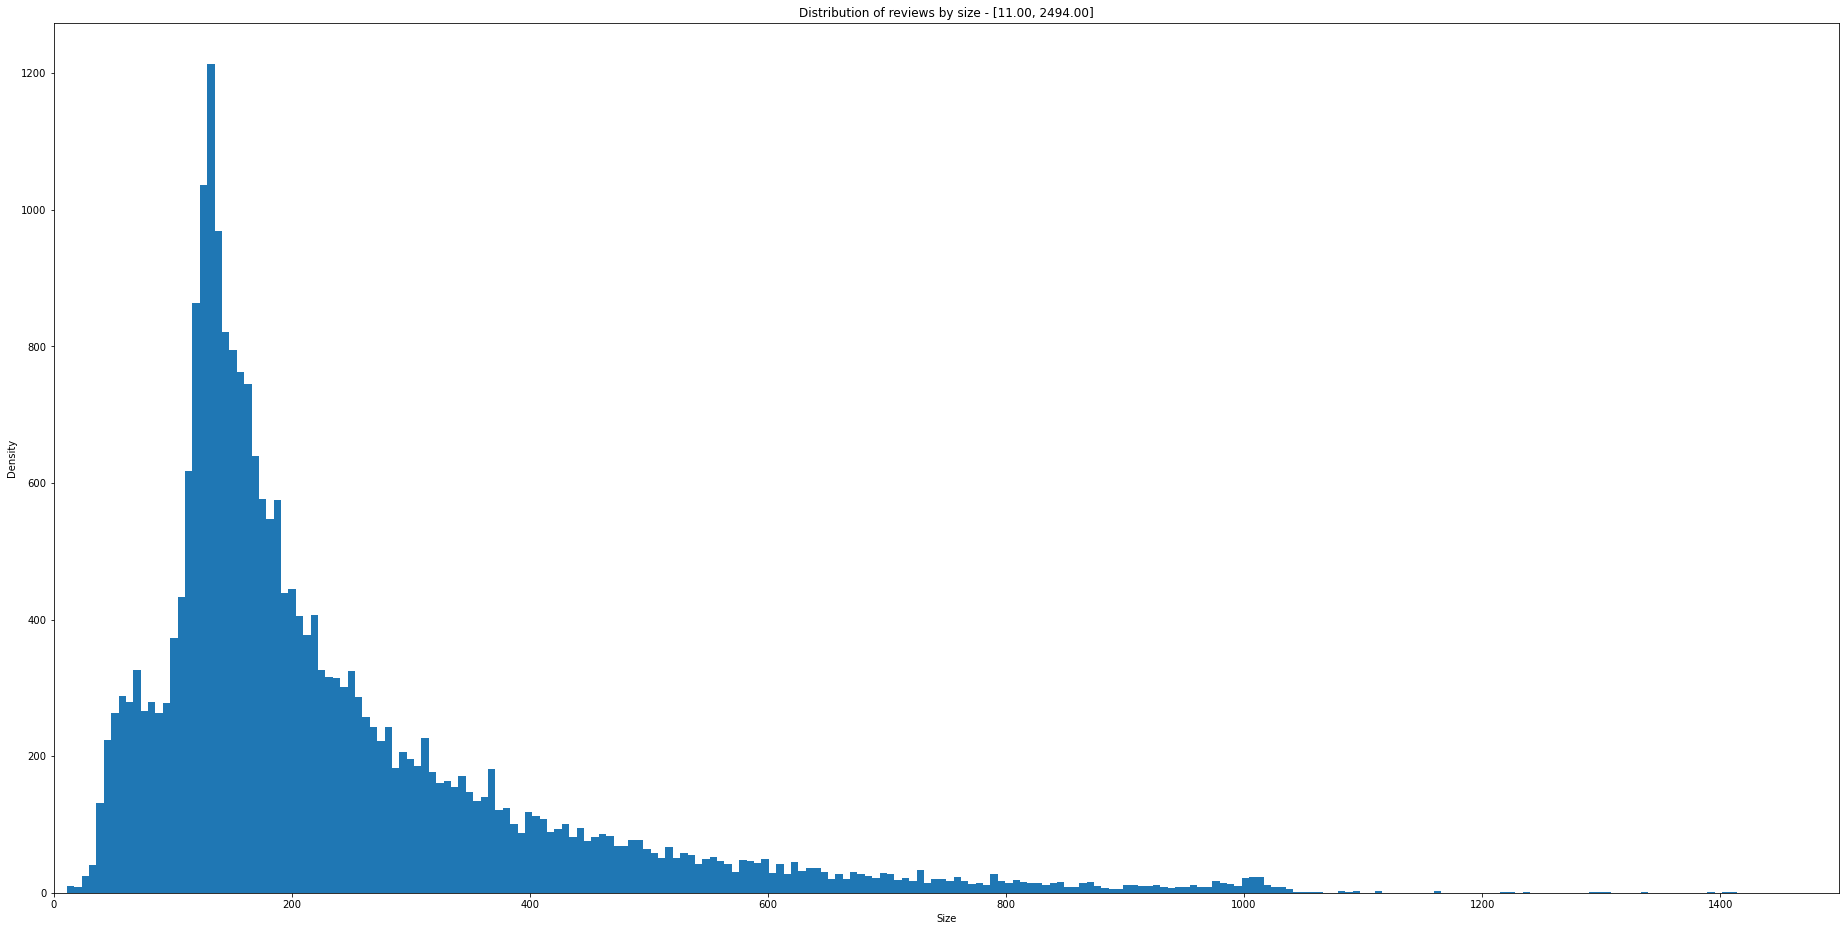

In [30]:
sizes=[len(i) for i in x_train]
plt.figure(figsize=(32,16))
plt.hist(sizes, bins=400)
plt.gca().set(title='Distribution of reviews by size - [{:5.2f}, {:5.2f}]'.format(min(sizes),max(sizes)), 
              xlabel='Size', ylabel='Density', xlim=[0,1500])
plt.show()

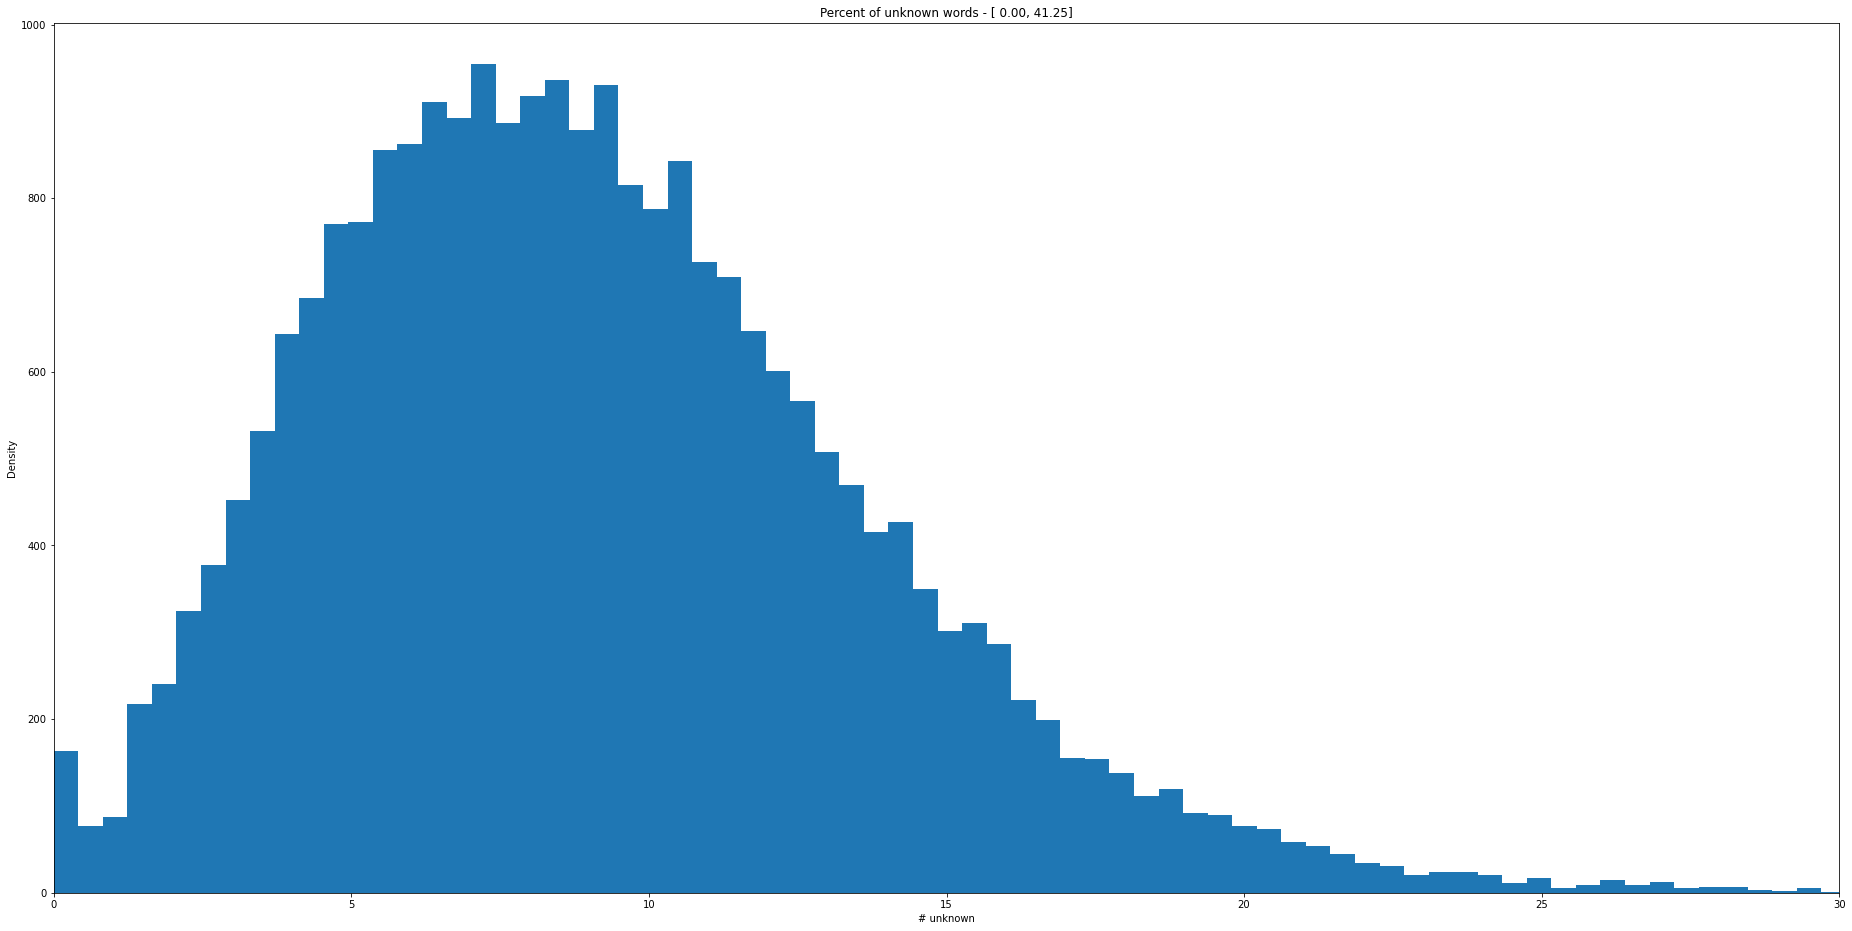

In [31]:
unk=[ 100*(s.count(2)/len(s)) for s in x_train]
plt.figure(figsize=(32,16))
plt.hist(unk, bins=100)
plt.gca().set(title='Percent of unknown words - [{:5.2f}, {:5.2f}]'.format(min(unk),max(unk)), 
              xlabel='# unknown', ylabel='Density', xlim=[0,30])
plt.show()

In [32]:
def one_hot_encoder(x, vector_size=10000):
    
    # ---- Set all to 0
    #
    x_encoded = np.zeros((len(x), vector_size))
    
    # ---- For each sentence
    #
    for i,sentence in enumerate(x):
        for word in sentence:
            x_encoded[i, word] = 1.

    return x_encoded

In [33]:
x_train = one_hot_encoder(x_train, vector_size=vocab_size)
x_test  = one_hot_encoder(x_test,  vector_size=vocab_size)

print("To have a look, x_train[12] became :", x_train[12] )

To have a look, x_train[12] became : [0. 1. 1. ... 0. 0. 0.]


## Model

In [34]:
def get_model(vector_size=10000):
    
    model = keras.Sequential()
    model.add(keras.layers.Input( shape=(vector_size,) ))
    model.add(keras.layers.Dense( 32, activation='relu'))
    model.add(keras.layers.Dense( 32, activation='relu'))
    model.add(keras.layers.Dense( 1, activation='sigmoid'))
    
    model.compile(optimizer = 'rmsprop',
                  loss      = 'binary_crossentropy',
                  metrics   = ['accuracy'])
    return model

In [35]:
model = get_model(vector_size=vocab_size)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161,121
Trainable params: 161,121
Non-trainable params: 0
_________________________________________________________________


In [36]:
run_dir='Text'

os.makedirs(f'{run_dir}/models',   mode=0o750, exist_ok=True)
save_dir = f'{run_dir}/models/best_model.h5'
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose=0, save_best_only=True)

In [37]:
history = model.fit(x_train,
                    y_train,
                    epochs          = epochs,
                    batch_size      = batch_size,
                    validation_data = (x_test, y_test),
                    verbose         = fit_verbosity,
                    callbacks       = [savemodel_callback])


Epoch 1/10
49/49 [==============================] - 4s 50ms/step - loss: 0.4405 - accuracy: 0.8128 - val_loss: 0.3796 - val_accuracy: 0.8400
Epoch 2/10
49/49 [==============================] - 1s 27ms/step - loss: 0.2683 - accuracy: 0.8978 - val_loss: 0.3273 - val_accuracy: 0.8638
Epoch 3/10
49/49 [==============================] - 1s 26ms/step - loss: 0.2268 - accuracy: 0.9129 - val_loss: 0.2850 - val_accuracy: 0.8841
Epoch 4/10
49/49 [==============================] - 1s 22ms/step - loss: 0.1993 - accuracy: 0.9231 - val_loss: 0.3208 - val_accuracy: 0.8721
Epoch 5/10
49/49 [==============================] - 1s 26ms/step - loss: 0.1824 - accuracy: 0.9296 - val_loss: 0.3122 - val_accuracy: 0.8774
Epoch 6/10
49/49 [==============================] - 1s 23ms/step - loss: 0.1603 - accuracy: 0.9391 - val_loss: 0.3829 - val_accuracy: 0.8582
Epoch 7/10
49/49 [==============================] - 1s 23ms/step - loss: 0.1467 - accuracy: 0.9452 - val_loss: 0.4196 - val_accuracy: 0.8491
Epoch 8/10
49

## Plot results

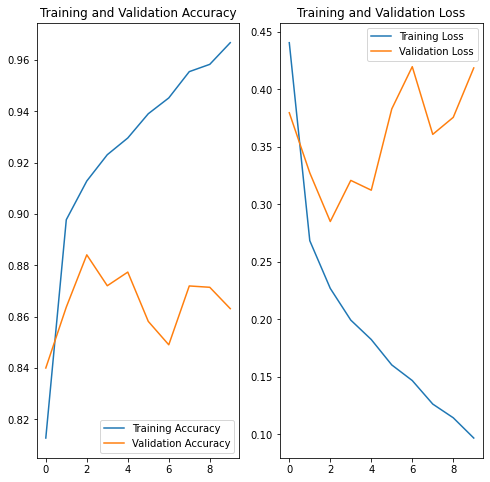

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model = keras.models.load_model(f'{run_dir}/models/best_model.h5')

# ---- Evaluate
score  = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / accuracy  : {:5.4f}'.format(score[1]))



x_test / loss      : 0.2850
x_test / accuracy  : 0.8841


([<matplotlib.patches.Wedge at 0x2350c00a0d0>,
 [Text(-0.7196110660647225, -0.8319614856453356, 'Accuracy'),
  Text(0.7196110660647226, 0.8319614856453355, 'Errors')],
 [Text(-0.392515126944394, -0.4537971739883648, '88.4%'),
  Text(0.3925151269443941, 0.4537971739883647, '11.6%')])

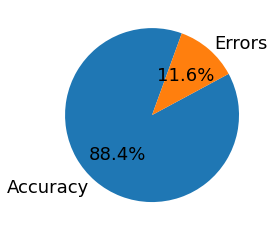

In [53]:
values=[score[1], 1-score[1]]
plt.pie(values, labels=["Accuracy", "Errors"], autopct='%1.1f%%', startangle=70, 
            textprops={'fontsize': 18})



782/782 [==============================] - 2s 3ms/step
tf.Tensor(
[[11143  1357]
 [ 1540 10960]], shape=(2, 2), dtype=int32)


<AxesSubplot:>

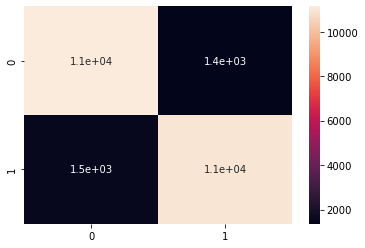

In [61]:
# ---- Confusion matrix
import seaborn as sns

y_sigmoid = model.predict(x_test)

y_pred = y_sigmoid.copy()
y_pred[ y_sigmoid< 0.5 ] = 0
y_pred[ y_sigmoid>=0.5 ] = 1    

cf_matrix=tf.math.confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix( y_test, y_pred, normalize="true")
df=pd.DataFrame(cm)
print(df)

         0        1
0  0.89144  0.10856
1  0.12320  0.87680
